In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [23]:
data = pd.read_csv('Salary_dataset.csv')

In [24]:
df = pd.DataFrame(data)
df

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0
5,5,3.0,56643.0
6,6,3.1,60151.0
7,7,3.3,54446.0
8,8,3.3,64446.0
9,9,3.8,57190.0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 852.0 bytes


In [26]:
x = df['YearsExperience'].values
y = df['Salary'].values

In [27]:
x

array([ 1.2,  1.4,  1.6,  2.1,  2.3,  3. ,  3.1,  3.3,  3.3,  3.8,  4. ,
        4.1,  4.1,  4.2,  4.6,  5. ,  5.2,  5.4,  6. ,  6.1,  6.9,  7.2,
        8. ,  8.3,  8.8,  9.1,  9.6,  9.7, 10.4, 10.6])

In [28]:
y

array([ 39344.,  46206.,  37732.,  43526.,  39892.,  56643.,  60151.,
        54446.,  64446.,  57190.,  63219.,  55795.,  56958.,  57082.,
        61112.,  67939.,  66030.,  83089.,  81364.,  93941.,  91739.,
        98274., 101303., 113813., 109432., 105583., 116970., 112636.,
       122392., 121873.])

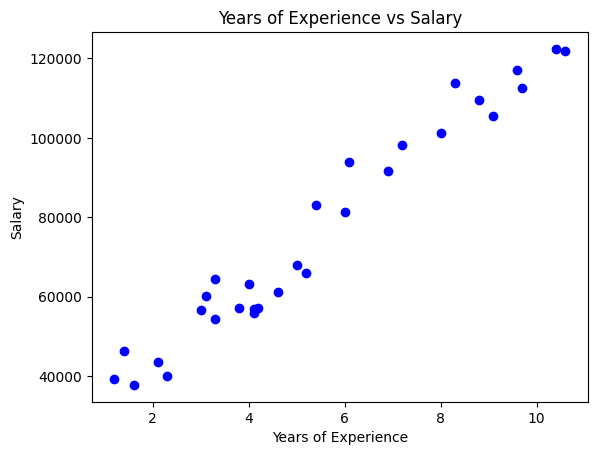

In [29]:
# Scatter plot to visualize the relationship between Years of Experience and Salary
plt.scatter(x, y, color='blue')
plt.title('Years of Experience vs Salary')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [30]:

df.drop(['Unnamed: 0'], axis=1, inplace=True)
df

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0
5,3.0,56643.0
6,3.1,60151.0
7,3.3,54446.0
8,3.3,64446.0
9,3.8,57190.0


In [31]:
# splitting the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape
x_train = x_train.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)
x_train.shape, x_test.shape, y_train.shape, y_test.shape


((24, 1), (6, 1), (24, 1), (6, 1))

In [32]:
x_train

array([[10.4],
       [ 8.8],
       [ 4.1],
       [ 1.2],
       [ 2.3],
       [ 5.2],
       [ 3. ],
       [ 4.2],
       [ 4.1],
       [ 8. ],
       [ 1.4],
       [ 1.6],
       [ 9.1],
       [ 2.1],
       [ 7.2],
       [ 9.6],
       [ 6. ],
       [10.6],
       [ 6.9],
       [ 3.3],
       [ 4. ],
       [ 4.6],
       [ 6.1],
       [ 3.1]])

In [33]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [34]:
model.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [35]:
y_pred = model.predict(x_test)
y_pred

array([[115791.21011287],
       [ 71499.27809463],
       [102597.86866063],
       [ 75268.80422384],
       [ 55478.79204548],
       [ 60190.69970699]])

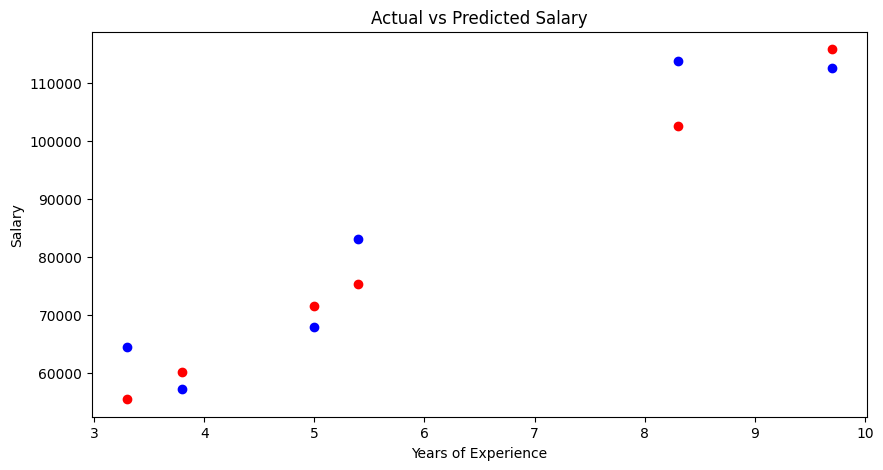

In [36]:
plt.figure(figsize = (10, 5))
plt.scatter(x_test, y_test, color = 'blue', label = 'Actual Salary')
plt.scatter(x_test, y_pred, color = 'red', label = 'Predicted Salary')
plt.title('Actual vs Predicted Salary')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()



In [37]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score
r2score = r2_score(y_test, y_pred)
print("Accuracy (R^2 Score):", r2score*100)
print("MSE:", mean_squared_error(y_test, y_pred))

Accuracy (R^2 Score): 90.24461774180497
MSE: 49830096.855908334
